In [4]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import time

class KMeansClustering:
    def fit(self, data_points):
        kmeans = KMeans(n_clusters=self.num_clusters, n_init=10)  # Added n_init for multiple runs
        kmeans.fit(data_points)
        return kmeans.labels_, kmeans.cluster_centers_

    def __init__(self, num_clusters=64):
        self.num_clusters = num_clusters

class LazySnapping(KMeansClustering):
    def lzsnap(self, image, stroke_image):
        foreground_sp, background_sp = self.get_seed_pixels(image, stroke_image)
        fg_labels, fg_centroids = self.fit(foreground_sp)
        bg_labels, bg_centroids = self.fit(background_sp)

        segmented_image = np.zeros_like(image)
        h, w = image.shape[:2]
        weight_factor = 0.1  # Weighting factor

        for i in range(h):
            for j in range(w):
                pixel = image[i, j]
                fg_likelihood = self.likelihood(pixel, fg_centroids, weight_factor)
                bg_likelihood = self.likelihood(pixel, bg_centroids, weight_factor)

                if fg_likelihood > bg_likelihood:
                    segmented_image[i, j] = [255, 255, 255]
                else:
                    segmented_image[i, j] = pixel

        return segmented_image

    def __init__(self, num_clusters=32):
        super().__init__(num_clusters)

    def likelihood(self, pixel, centroids, weight_factor, sigma=10.0):
        distances = np.linalg.norm(pixel - centroids, axis=1)
        return np.sum(np.exp(-distances / sigma) * weight_factor)  # Apply weighting factor

    def get_seed_pixels(self, image, stroke_image, color_tolerance=30):
        fg_mask = np.all(np.abs(stroke_image - [255, 0, 0]) <= color_tolerance, axis=-1)
        bg_mask = np.all(np.abs(stroke_image - [0, 0, 255]) <= color_tolerance, axis=-1)
        foreground_sp = image[fg_mask]
        background_sp = image[bg_mask]
        return foreground_sp, background_sp

if __name__ == "__main__":
    # Your test cases and result reporting code here
    image = cv2.imread("van Gogh.PNG")
    stroke_image = cv2.imread("van Gogh stroke.png")
    
    cluster_sizes = [32, 64, 128]

    for num_clusters in cluster_sizes:
        start_time = time.time()
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        end_time = time.time()
        runtime = end_time - start_time

        print(f"Runtime for {num_clusters} clusters: {runtime:.2f} seconds")
        cv2.imwrite(f"segmentedvanogh{num_clusters}.jpg", segmented_image)
    
    image = cv2.imread("lady.PNG")
    stroke_image = cv2.imread("lady stroke 1.png")
    for num_clusters in cluster_sizes:
        start_time = time.time()
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        end_time = time.time()
        runtime = end_time - start_time

        print(f"Runtime for {num_clusters} clusters: {runtime:.2f} seconds")
        cv2.imwrite(f"segmentedady{num_clusters}.jpg", segmented_image)
    
    image = cv2.imread("lady.PNG")
    stroke_image = cv2.imread("lady stroke 2.png")
    for num_clusters in cluster_sizes:
        start_time = time.time()
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        end_time = time.time()
        runtime = end_time - start_time

        print(f"Runtime for {num_clusters} clusters: {runtime:.2f} seconds")
        cv2.imwrite(f"segmentedady2{num_clusters}.jpg", segmented_image)
   
    image = cv2.imread("Mona-lisa.PNG")
    stroke_image = cv2.imread("Mona-lisa stroke 1.png")
    for num_clusters in cluster_sizes:
        start_time = time.time()
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        end_time = time.time()
        runtime = end_time - start_time

        print(f"Runtime for {num_clusters} clusters: {runtime:.2f} seconds")
        cv2.imwrite(f"segmentedona1{num_clusters}.jpg", segmented_image)
        
    image = cv2.imread("Mona-lisa.PNG")
    stroke_image = cv2.imread("Mona-lisa stroke 2.png")
    for num_clusters in cluster_sizes:
        start_time = time.time()
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        end_time = time.time()
        runtime = end_time - start_time

        print(f"Runtime for {num_clusters} clusters: {runtime:.2f} seconds")
        cv2.imwrite(f"segmentedona2{num_clusters}.jpg", segmented_image)


Runtime for 32 clusters: 36.95 seconds
Runtime for 64 clusters: 36.16 seconds
Runtime for 128 clusters: 42.77 seconds
Runtime for 32 clusters: 24.87 seconds
Runtime for 64 clusters: 24.77 seconds
Runtime for 128 clusters: 27.47 seconds
Runtime for 32 clusters: 20.90 seconds
Runtime for 64 clusters: 24.52 seconds
Runtime for 128 clusters: 27.07 seconds
Runtime for 32 clusters: 25.86 seconds
Runtime for 64 clusters: 27.07 seconds
Runtime for 128 clusters: 29.35 seconds
Runtime for 32 clusters: 26.17 seconds
Runtime for 64 clusters: 25.86 seconds
Runtime for 128 clusters: 40.42 seconds


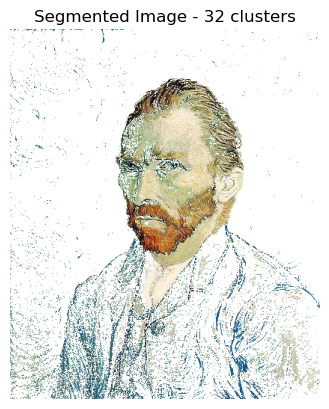

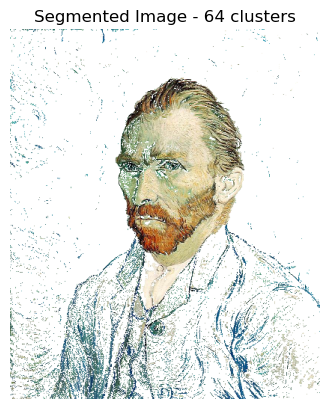

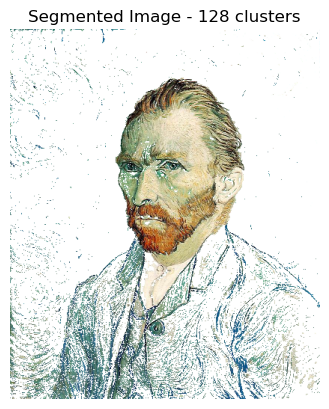

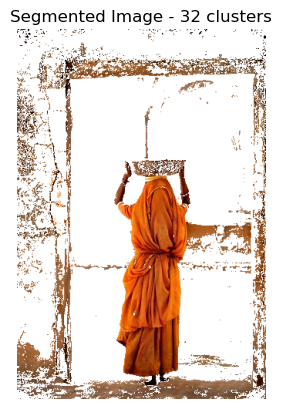

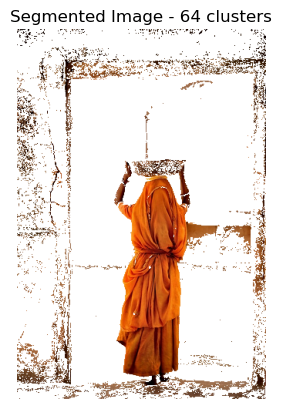

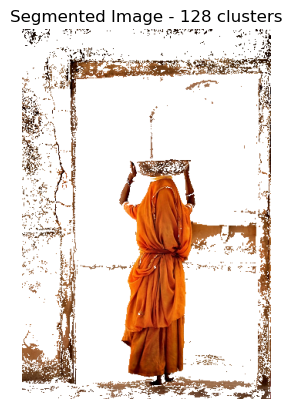

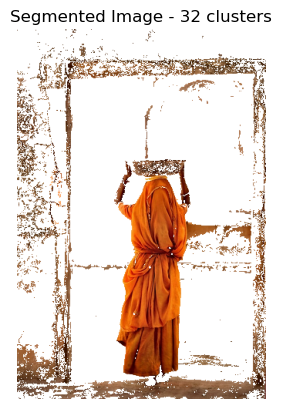

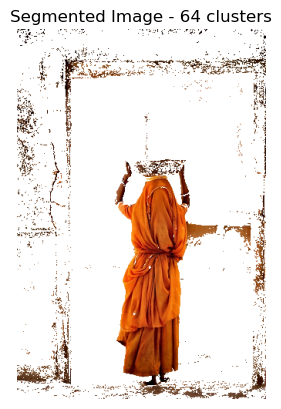

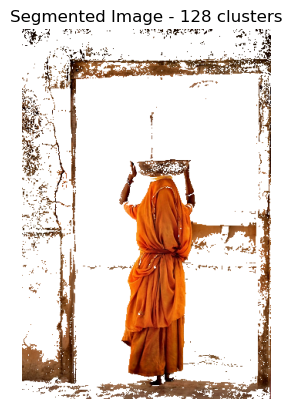

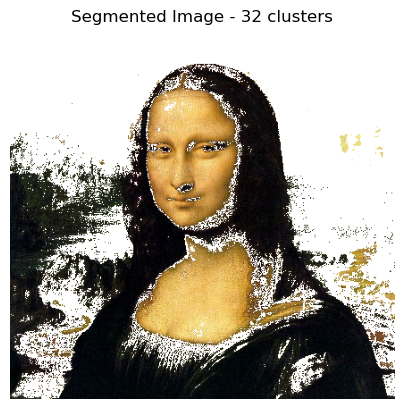

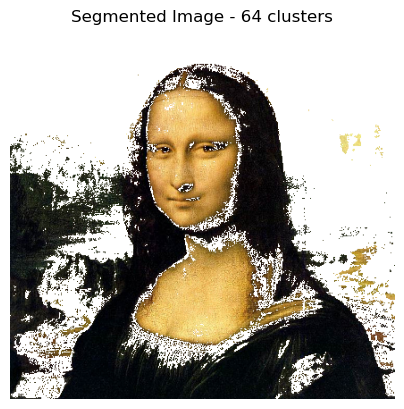

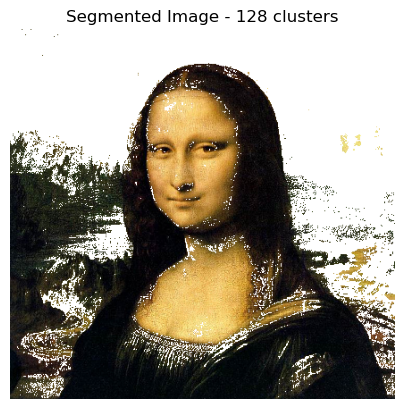

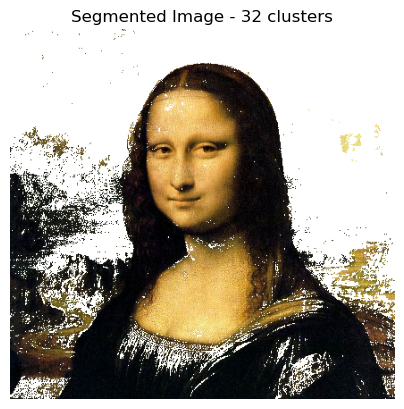

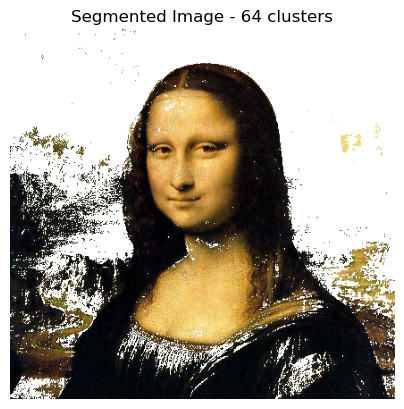

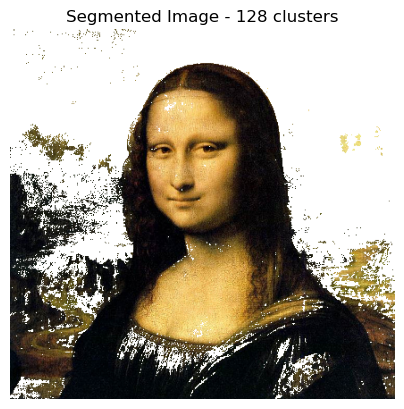

In [14]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import time
import matplotlib.pyplot as plt

class KMeansClustering:
    def fit(self, data_points):
        kmeans = KMeans(n_clusters=self.num_clusters, n_init=10)  # Added n_init for multiple runs
        kmeans.fit(data_points)
        return kmeans.labels_, kmeans.cluster_centers_

    def __init__(self, num_clusters=64):
        self.num_clusters = num_clusters

class LazySnapping(KMeansClustering):
    def lzsnap(self, image, stroke_image):
        foreground_sp, background_sp = self.get_seed_pixels(image, stroke_image)
        fg_labels, fg_centroids = self.fit(foreground_sp)
        bg_labels, bg_centroids = self.fit(background_sp)

        segmented_image = np.zeros_like(image)
        h, w = image.shape[:2]
        weight_factor = 0.1  # Weighting factor

        for i in range(h):
            for j in range(w):
                pixel = image[i, j]
                fg_likelihood = self.likelihood(pixel, fg_centroids, weight_factor)
                bg_likelihood = self.likelihood(pixel, bg_centroids, weight_factor)

                if fg_likelihood > bg_likelihood:
                    segmented_image[i, j] = [255, 255, 255]
                else:
                    segmented_image[i, j] = pixel

        return segmented_image

    def __init__(self, num_clusters=32):
        super().__init__(num_clusters)

    def likelihood(self, pixel, centroids, weight_factor, sigma=10.0):
        distances = np.linalg.norm(pixel - centroids, axis=1)
        return np.sum(np.exp(-distances / sigma) * weight_factor)  ** 2 #Apply weighting factor with square 

    def get_seed_pixels(self, image, stroke_image, color_tolerance=30):
        fg_mask = np.all(np.abs(stroke_image - [255, 0, 0]) <= color_tolerance, axis=-1)
        bg_mask = np.all(np.abs(stroke_image - [0, 0, 255]) <= color_tolerance, axis=-1)
        foreground_sp = image[fg_mask]
        background_sp = image[bg_mask]
        return foreground_sp, background_sp

if __name__ == "__main__":
    # Your test cases and result reporting code here
    image = cv2.imread("van Gogh.PNG")
    stroke_image = cv2.imread("van Gogh stroke.png")
    
    cluster_sizes = [32, 64, 128]

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()
    
   
    image = cv2.imread("lady.PNG")
    stroke_image = cv2.imread("lady stroke 1.png")

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()
        
      
    image = cv2.imread("lady.PNG")
    stroke_image = cv2.imread("lady stroke 2.png")

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()
        
      
    image = cv2.imread("Mona-lisa.PNG")
    stroke_image = cv2.imread("Mona-lisa stroke 1.png")

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()
        
   
    image = cv2.imread("Mona-lisa.PNG")
    stroke_image = cv2.imread("Mona-lisa stroke 2.png")

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()

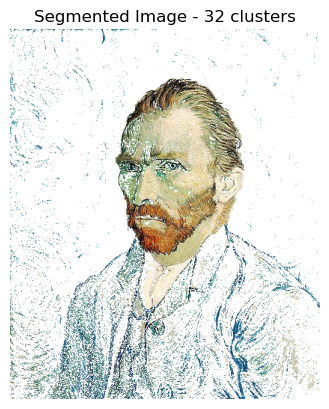

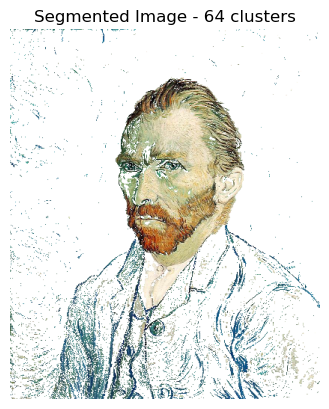

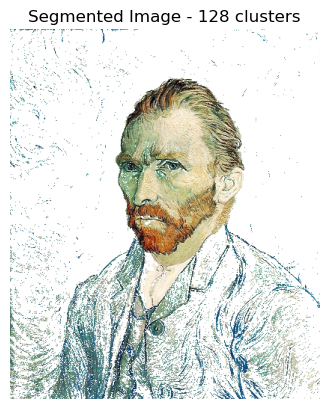

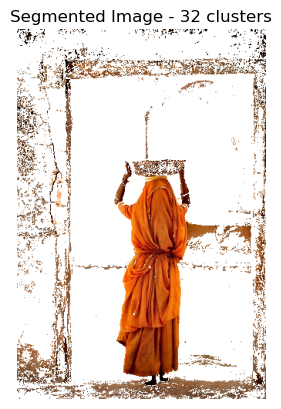

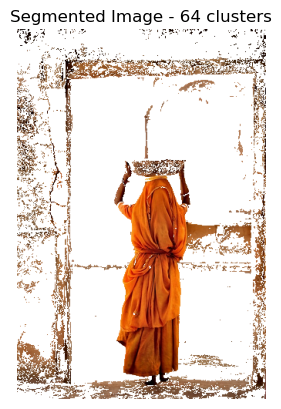

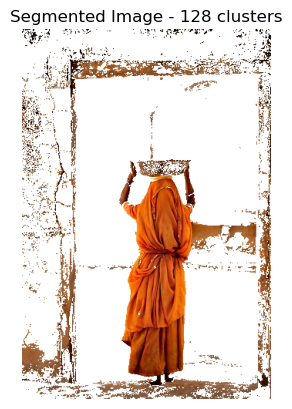

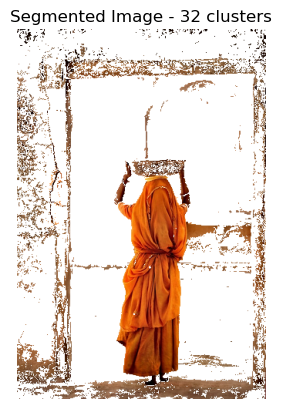

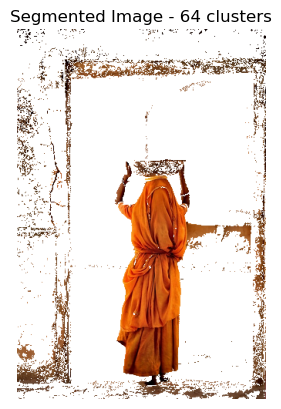

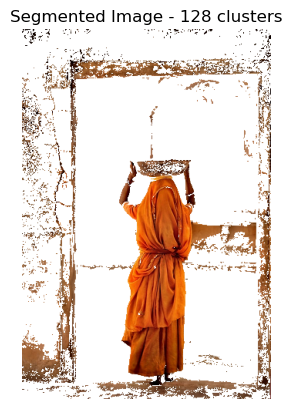

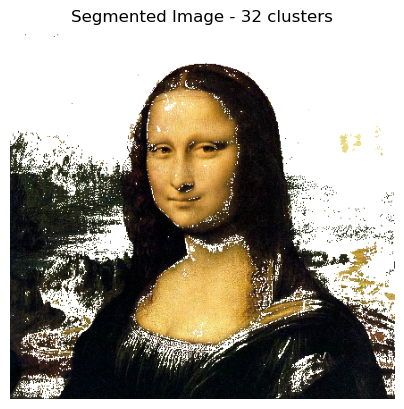

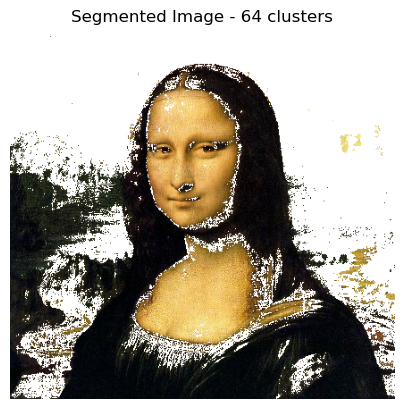

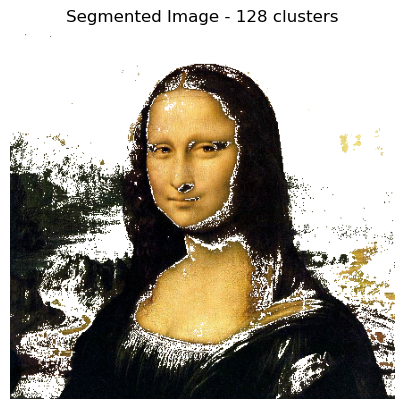

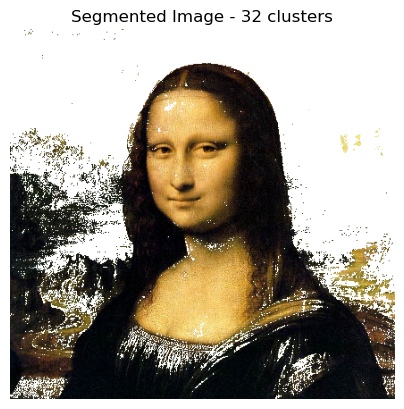

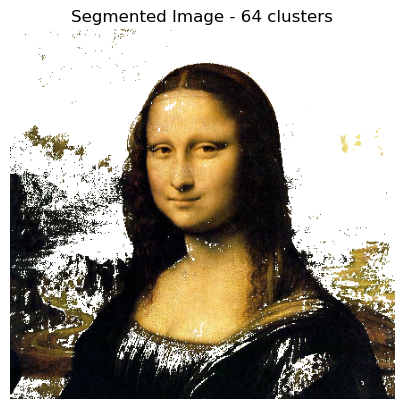

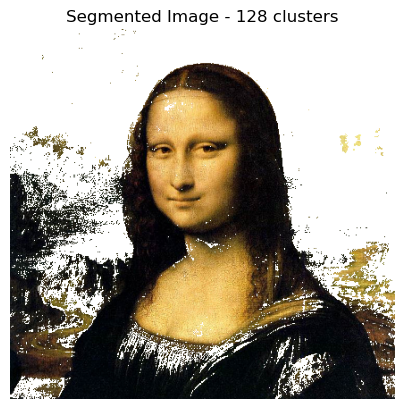

In [8]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import time
import matplotlib.pyplot as plt

class KMeansClustering:
    def fit(self, data_points):
        kmeans = KMeans(n_clusters=self.num_clusters, n_init=10)  # Added n_init for multiple runs
        kmeans.fit(data_points)
        return kmeans.labels_, kmeans.cluster_centers_

    def __init__(self, num_clusters=64):
        self.num_clusters = num_clusters

class LazySnapping(KMeansClustering):
    def lzsnap(self, image, stroke_image):
        foreground_sp, background_sp = self.get_seed_pixels(image, stroke_image)
        fg_labels, fg_centroids = self.fit(foreground_sp)
        bg_labels, bg_centroids = self.fit(background_sp)

        segmented_image = np.zeros_like(image)
        h, w = image.shape[:2]
        weight_factor = 0.1  # Weighting factor

        for i in range(h):
            for j in range(w):
                pixel = image[i, j]
                fg_likelihood = self.likelihood(pixel, fg_centroids, weight_factor)
                bg_likelihood = self.likelihood(pixel, bg_centroids, weight_factor)

                if fg_likelihood > bg_likelihood:
                    segmented_image[i, j] = [255, 255, 255]
                else:
                    segmented_image[i, j] = pixel

        return segmented_image

    def __init__(self, num_clusters=32):
        super().__init__(num_clusters)

    def likelihood(self, pixel, centroids, weight_factor, sigma=10.0):
        distances = np.linalg.norm(pixel - centroids, axis=1)
        return np.sum(np.exp(-distances / sigma) * weight_factor)  # Apply weighting factor

    def get_seed_pixels(self, image, stroke_image, color_tolerance=30):
        fg_mask = np.all(np.abs(stroke_image - [255, 0, 0]) <= color_tolerance, axis=-1)
        bg_mask = np.all(np.abs(stroke_image - [0, 0, 255]) <= color_tolerance, axis=-1)
        foreground_sp = image[fg_mask]
        background_sp = image[bg_mask]
        return foreground_sp, background_sp

if __name__ == "__main__":
    # Your test cases and result reporting code here
    image = cv2.imread("van Gogh.PNG")
    stroke_image = cv2.imread("van Gogh stroke.png")
    
    cluster_sizes = [32, 64, 128]

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()
    
   
    image = cv2.imread("lady.PNG")
    stroke_image = cv2.imread("lady stroke 1.png")

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()
        
      
    image = cv2.imread("lady.PNG")
    stroke_image = cv2.imread("lady stroke 2.png")

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()
        
      
    image = cv2.imread("Mona-lisa.PNG")
    stroke_image = cv2.imread("Mona-lisa stroke 1.png")

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()
        
   
    image = cv2.imread("Mona-lisa.PNG")
    stroke_image = cv2.imread("Mona-lisa stroke 2.png")

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()

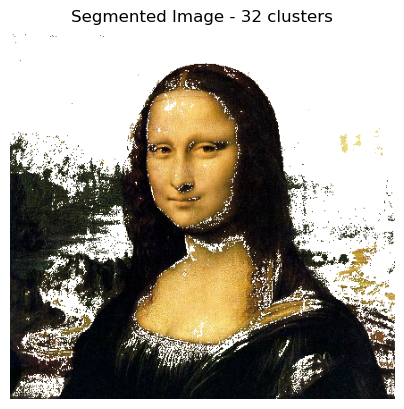

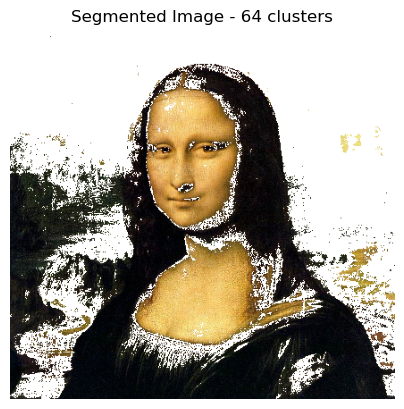

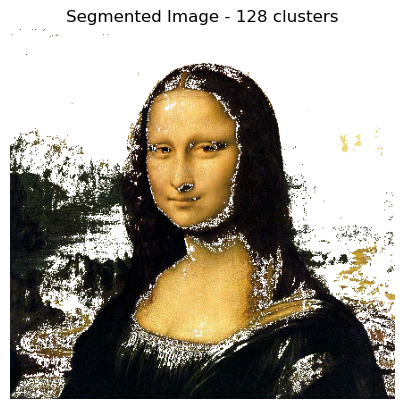

In [13]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import time
import matplotlib.pyplot as plt

class KMeansClustering:
    def fit(self, data_points):
        kmeans = KMeans(n_clusters=self.num_clusters, n_init=10)  # Added n_init for multiple runs
        kmeans.fit(data_points)
        return kmeans.labels_, kmeans.cluster_centers_

    def __init__(self, num_clusters=64):
        self.num_clusters = num_clusters

class LazySnapping(KMeansClustering):
    def lzsnap(self, image, stroke_image):
        foreground_sp, background_sp = self.get_seed_pixels(image, stroke_image)
        fg_labels, fg_centroids = self.fit(foreground_sp)
        bg_labels, bg_centroids = self.fit(background_sp)

        segmented_image = np.zeros_like(image)
        h, w = image.shape[:2]
        weight_factor = 0.1  # Weighting factor

        for i in range(h):
            for j in range(w):
                pixel = image[i, j]
                fg_likelihood = self.likelihood(pixel, fg_centroids, weight_factor)
                bg_likelihood = self.likelihood(pixel, bg_centroids, weight_factor)

                if fg_likelihood > bg_likelihood:
                    segmented_image[i, j] = [255, 255, 255]
                else:
                    segmented_image[i, j] = pixel

        return segmented_image

    def __init__(self, num_clusters=32):
        super().__init__(num_clusters)

    def likelihood(self, pixel, centroids, weight_factor, sigma=10.0):
        distances = np.linalg.norm(pixel - centroids, axis=1)
        return np.sum(np.exp(-distances / sigma) * weight_factor)# Apply weighting factor

    def get_seed_pixels(self, image, stroke_image, color_tolerance=30):
        fg_mask = np.all(np.abs(stroke_image - [255, 0, 0]) <= color_tolerance, axis=-1)
        bg_mask = np.all(np.abs(stroke_image - [0, 0, 255]) <= color_tolerance, axis=-1)
        foreground_sp = image[fg_mask]
        background_sp = image[bg_mask]
        return foreground_sp, background_sp

if __name__ == "__main__":
    
    image = cv2.imread("Mona-lisa.PNG")
    stroke_image = cv2.imread("Mona-lisa stroke 1.png")
    
    cluster_sizes = [32, 64, 128]

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()
    
   

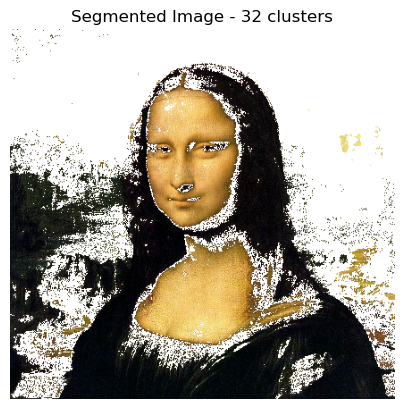

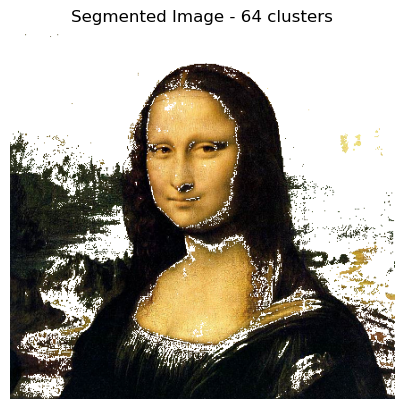

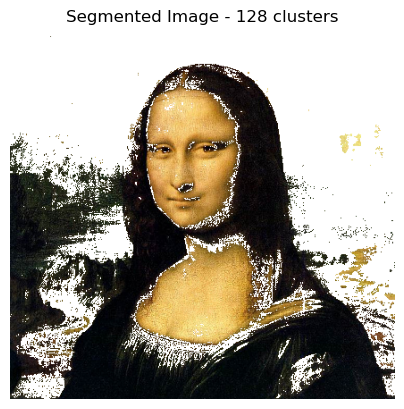

In [12]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import time
import matplotlib.pyplot as plt

class KMeansClustering:
    def fit(self, data_points):
        kmeans = KMeans(n_clusters=self.num_clusters, n_init=10)  # Added n_init for multiple runs
        kmeans.fit(data_points)
        return kmeans.labels_, kmeans.cluster_centers_

    def __init__(self, num_clusters=64):
        self.num_clusters = num_clusters

class LazySnapping(KMeansClustering):
    def lzsnap(self, image, stroke_image):
        foreground_sp, background_sp = self.get_seed_pixels(image, stroke_image)
        fg_labels, fg_centroids = self.fit(foreground_sp)
        bg_labels, bg_centroids = self.fit(background_sp)

        segmented_image = np.zeros_like(image)
        h, w = image.shape[:2]
        weight_factor = 0.1  # Weighting factor

        for i in range(h):
            for j in range(w):
                pixel = image[i, j]
                fg_likelihood = self.likelihood(pixel, fg_centroids, weight_factor)
                bg_likelihood = self.likelihood(pixel, bg_centroids, weight_factor)

                if fg_likelihood > bg_likelihood:
                    segmented_image[i, j] = [255, 255, 255]
                else:
                    segmented_image[i, j] = pixel

        return segmented_image

    def __init__(self, num_clusters=32):
        super().__init__(num_clusters)

    def likelihood(self, pixel, centroids, weight_factor, sigma=10.0):
        distances = np.linalg.norm(pixel - centroids, axis=1)
        return np.sum(np.exp(-distances / sigma) * weight_factor) ** 2 # Apply weighting factor

    def get_seed_pixels(self, image, stroke_image, color_tolerance=30):
        fg_mask = np.all(np.abs(stroke_image - [255, 0, 0]) <= color_tolerance, axis=-1)
        bg_mask = np.all(np.abs(stroke_image - [0, 0, 255]) <= color_tolerance, axis=-1)
        foreground_sp = image[fg_mask]
        background_sp = image[bg_mask]
        return foreground_sp, background_sp

if __name__ == "__main__":
    # Your test cases and result reporting code here
    image = cv2.imread("Mona-lisa.PNG")
    stroke_image = cv2.imread("Mona-lisa stroke 1.png")
    
    cluster_sizes = [32, 64, 128]

    for num_clusters in cluster_sizes:
        lazy_snapping_obj = LazySnapping(num_clusters=num_clusters)
        segmented_image = lazy_snapping_obj.lzsnap(image, stroke_image)
        
        # Display the segmented image using Matplotlib
        plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmented Image - {num_clusters} clusters")
        plt.axis('off')  # Hide axis
        plt.show()
    
   